In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv("C:/Users/L390/Documents/derie temporel/tp2/consommation_energie.csv")
df.head()

,Date,Consommation
0,2024-01-01,87.854994
1,2024-01-02,130.140824
2,2024-01-03,55.271927
3,2024-01-04,82.344432
4,2024-01-05,126.522065


In [49]:
df.head()

,Consommation
0,87.854994
1,130.140824
2,55.271927
3,82.344432
4,126.522065


In [34]:
df.shape


(366, 2)

In [35]:
df.isnull().sum()

Date            0
Consommation    0
dtype: int64

In [36]:
df.info

<bound method DataFrame.info of            Date  Consommation
0    2024-01-01     87.854994
1    2024-01-02    130.140824
2    2024-01-03     55.271927
3    2024-01-04     82.344432
4    2024-01-05    126.522065
..          ...           ...
361  2024-12-27     70.923844
362  2024-12-28     69.290656
363  2024-12-29    108.275011
364  2024-12-30     85.144985
365  2024-12-31     90.264011

[366 rows x 2 columns]>

In [37]:
df.describe

<bound method NDFrame.describe of            Date  Consommation
0    2024-01-01     87.854994
1    2024-01-02    130.140824
2    2024-01-03     55.271927
3    2024-01-04     82.344432
4    2024-01-05    126.522065
..          ...           ...
361  2024-12-27     70.923844
362  2024-12-28     69.290656
363  2024-12-29    108.275011
364  2024-12-30     85.144985
365  2024-12-31     90.264011

[366 rows x 2 columns]>

In [38]:
df.min()

Date            2024-01-01
Consommation     41.915091
dtype: object

In [39]:
df.min()

Date            2024-01-01
Consommation     41.915091
dtype: object

In [67]:
print(df['Date'].dtype)


object


<Axes: >

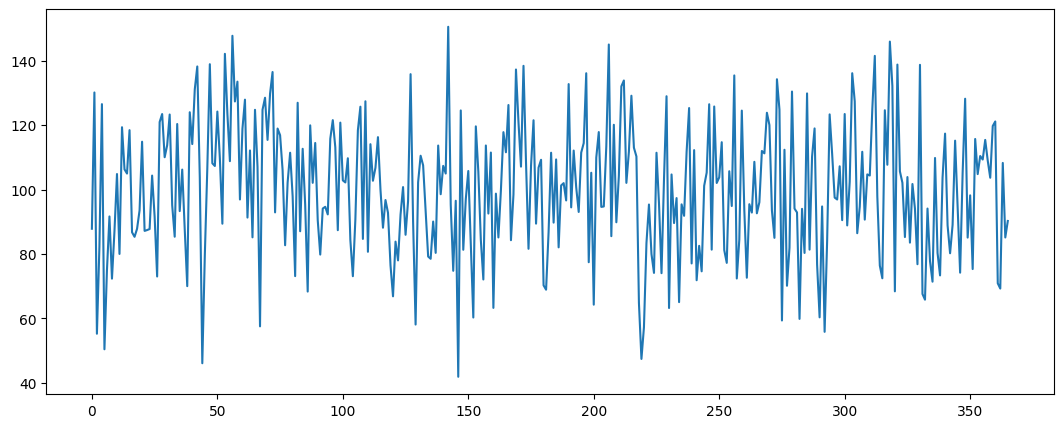

In [40]:
df['Consommation'].plot(figsize=(13,5))

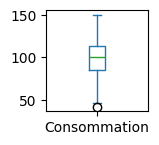

In [41]:
df.plot(kind='box',
        subplots=True, layout=(16,16), sharex=False, sharey=False, figsize=(25,25))
plt.show()

In [42]:
df=df.select_dtypes(include=['number']).copy()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_count = ((df > Q3 + 1.5 * IQR) | (df < Q1 - 1.5 * IQR)).sum()
for col in df.columns:
    print(f"Variable : {col}")
    print(f"Q1 : {Q1[col]}")
    print(f"Q3 : {Q3[col]}")
    print(f"IQR : {IQR[col]}")
    print(f"Nombre de valeurs extrêmes : {outliers_count[col]}")
    print("---------------------------")

# affichage sous forme de tableau
outliers_df = pd.DataFrame({'Variable': outliers_count.index, 'Nombre de valeurs extrêmes': outliers_count.values})
print(outliers_df)

Variable : Consommation
Q1 : 85.21068974386917
Q3 : 114.01043456912727
IQR : 28.799744825258102
Nombre de valeurs extrêmes : 1
---------------------------
       Variable  Nombre de valeurs extrêmes
0  Consommation                           1


In [46]:
df.corr()

,Consommation
Consommation,1.0


TypeError: plot() got an unexpected keyword argument 'x'

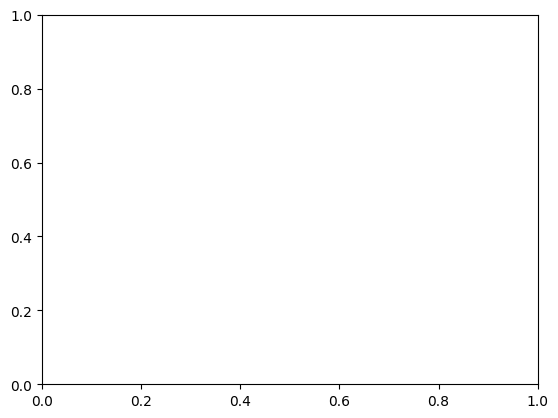

In [61]:
plt.plot(data=df , x = 'Date', y='Consommation')
plt.xlabel('Date')
plt.ylabel('Consommation')
plt.title('Graphique de consommation en fonction de la date')
plt.show()

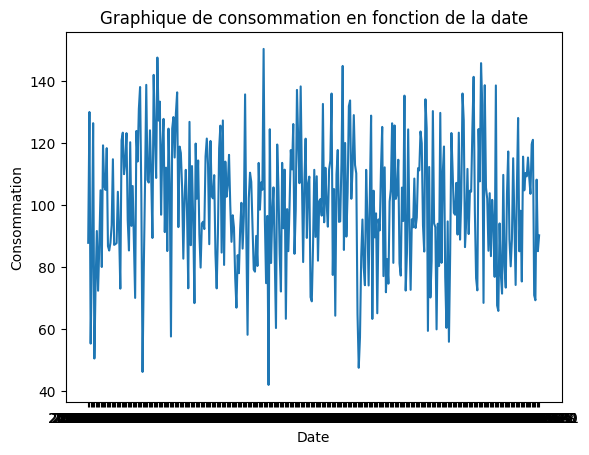

In [59]:


sns.lineplot(data=df, x='Date', y='Consommation')
plt.xlabel('Date')
plt.ylabel('Consommation')
plt.title('Graphique de consommation en fonction de la date')
plt.show()


In [62]:
df['Date']

0      2024-01-01
1      2024-01-02
2      2024-01-03
3      2024-01-04
4      2024-01-05
          ...    
361    2024-12-27
362    2024-12-28
363    2024-12-29
364    2024-12-30
365    2024-12-31
Name: Date, Length: 366, dtype: object

In [70]:

df['Date'] = pd.to_datetime(df['Date'])


In [71]:
df['Month'] = df['Date'].dt.month


In [72]:
df.head()

,Date,Consommation,Month
0,2024-01-01,87.854994,1
1,2024-01-02,130.140824,1
2,2024-01-03,55.271927,1
3,2024-01-04,82.344432,1
4,2024-01-05,126.522065,1


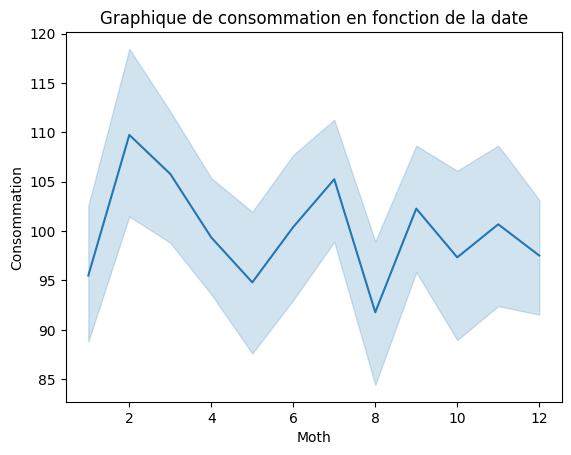

In [73]:
sns.lineplot(data=df, x='Month', y='Consommation')
plt.xlabel('Moth')
plt.ylabel('Consommation')
plt.title('Graphique de consommation en fonction de la date')
plt.show()

In [74]:
df['Quarter'] = df['Date'].dt.quarter


In [75]:
df.head()

,Date,Consommation,Month,Quarter
0,2024-01-01,87.854994,1,1
1,2024-01-02,130.140824,1,1
2,2024-01-03,55.271927,1,1
3,2024-01-04,82.344432,1,1
4,2024-01-05,126.522065,1,1


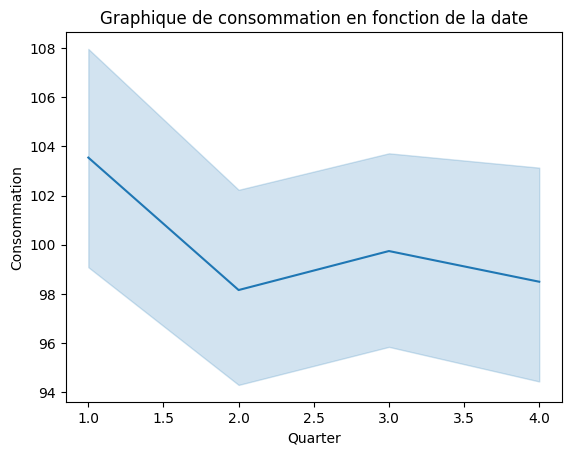

In [77]:
sns.lineplot(data=df, x='Quarter', y='Consommation')
plt.xlabel('Quarter')
plt.ylabel('Consommation')
plt.title('Graphique de consommation en fonction de la date')
plt.show()

In [78]:
df['Day_of_week'] = df['Date'].dt.dayofweek


In [82]:
df.head()

,Date,Consommation,Month,Quarter,Day_of_week
0,2024-01-01,87.854994,1,1,0
1,2024-01-02,130.140824,1,1,1
2,2024-01-03,55.271927,1,1,2
3,2024-01-04,82.344432,1,1,3
4,2024-01-05,126.522065,1,1,4


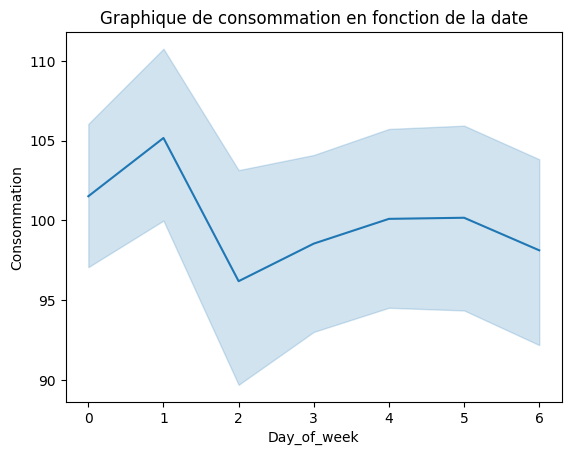

In [84]:
sns.lineplot(data=df, x='Day_of_week', y='Consommation')
plt.xlabel('Day_of_week')
plt.ylabel('Consommation')
plt.title('Graphique de consommation en fonction de la date')
plt.show()